#                                           Time Series Analysis 

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://towardsdatascience.com/predict-electricity-consumption-using-time-series-analysis-4650284e40aa

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb

https://www.youtube.com/watch?v=8FCDpFhd1zk

https://www.youtube.com/watch?v=W-YCKMNTcqE -- Krish Naik 

https://github.com/alexanderbeat/dsc-sarima-models-lab-online-ds-pt-100719  -- all concept.


https://medium.datadriveninvestor.com/multivariate-time-series-using-gated-recurrent-unit-gru-1039099e545a

https://pub.towardsai.net/time-series-forecasting-using-an-lstm-model-974a86288889

https://towardsdatascience.com/time-series-of-price-anomaly-detection-with-lstm-11a12ba4f6d9 -- anomaly detection

https://towardsdatascience.com/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python-1d1076fc89a0

https://towardsdatascience.com/time-series-classification-for-human-activity-recognition-with-lstms-using-tensorflow-2-and-keras-b816431afdff -- timeseries with classification

https://github.com/rimanshu/Anomaly_Detection/blob/main/Data%20Science/Anomaly%20Detection%20On%20Time%20Series%20Data%20-%20LSTM%20Autoencoder.ipynb

Time series forecasting is a technique for the prediction of events through a sequence of time. 

The techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.



# Steps to be followed in time series :- 

Exporatory and reading the data --- data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
    
1) Visualizing time series

In this step, we try to visualize the series. We try to identify all the underlying patterns related to the series like trend and seasonality. Do not worry about these terms right now, as we will discuss them during implementation. You can say that this is more a type of exploratory analysis of time series data.

# Stationarising time series --- plt.plot(ts)
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., “stationarised”) through the use of mathematical transformations. A stationarised series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! Another reason for trying to stationarise a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables

Method to test stationary - 

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for different confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

How to make a Time Series Stationary? 

There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.

2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

Estimating & Eliminating Trend : ts_log = np.log(ts) , plt.plot(ts_log)
Aggregation – taking average for a time period like monthly/weekly averages
Smoothing – taking rolling averages
Polynomial Fitting – fit a regression model

ts_log_moving_avg_diff = ts_log - moving_avg    , test_stationarity(ts_log_moving_avg_diff)

Drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor

# Eliminating Trend and Seasonality :
    
Differencing – taking the differece with a particular time lag - trend reduction technique

ts_log_diff = ts_log - ts_log.shift()   , plt.plot(ts_log_diff)

Decomposition – modeling both trend and seasonality and removing them from the model. - both trend and seasonal redusction technique

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:



# Forcasting of model

Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

3) Finding the best parameters for our model
We need to find optimal parameters for forecasting models one’s we have a stationary series. These parameters come from the ACF and PACF plots. Hence, this stage is more about plotting above two graphs and extracting optimal model parameters based on them.

4) Fitting model through Arima - Auto-Regressive Integrated Moving Averages.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Once we have our optimal model parameters, we can fit an ARIMA model to learn the pattern of the series. Always remember that time series algorithms work on stationary data only hence making a series stationary is an important aspect

5) Predictions
After fitting our model, we will be predicting the future in this stage

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)

plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Parameters --

p will depend on Pacf and it value equals to where it suddenly dropped or to negative. it suddenly shuts off.

d = how much differencing we have taken while removing seasonality. mostly one.

q = will depend on acf and it value equals to where it exponentially dropped and after that it zigzag curve.


After finding the mean, we take the difference of the series and the mean at every point in the series.
This way, we eliminate trends out of a series and obtain a more stationary series.

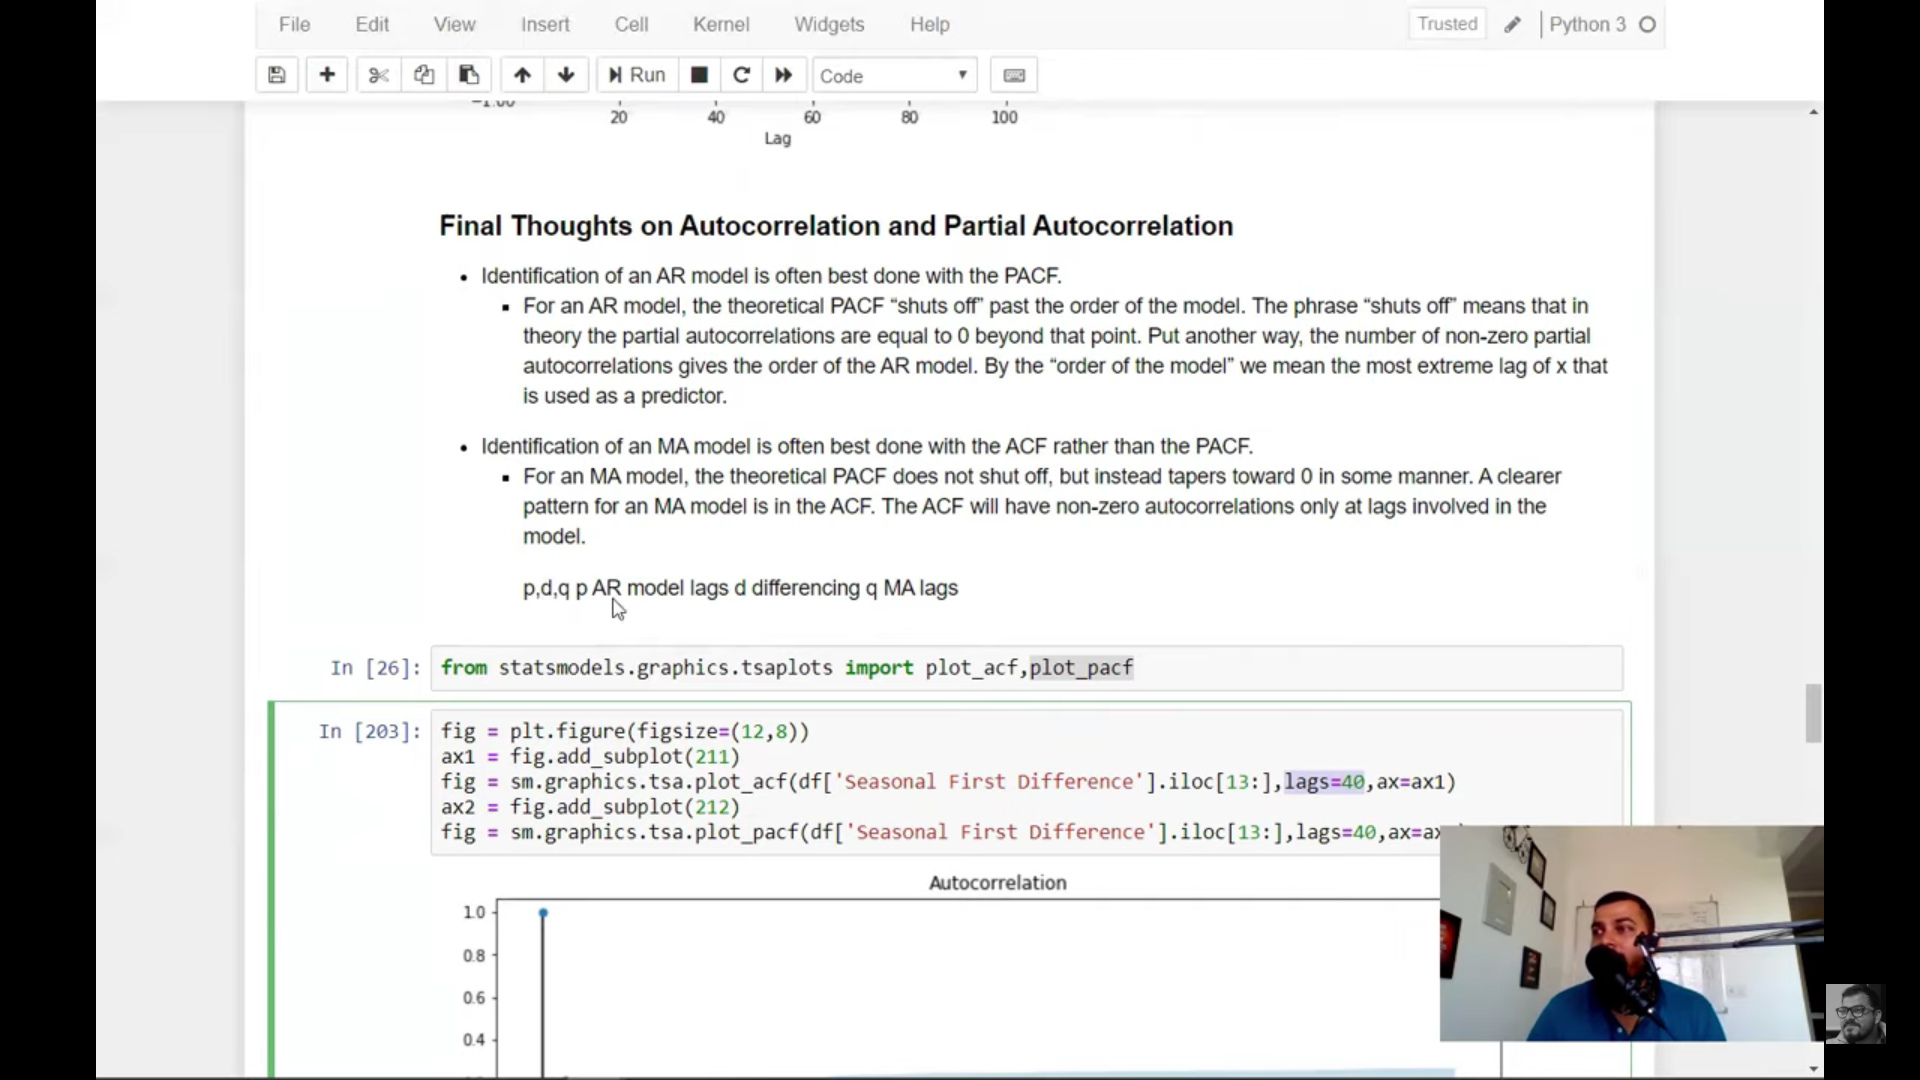

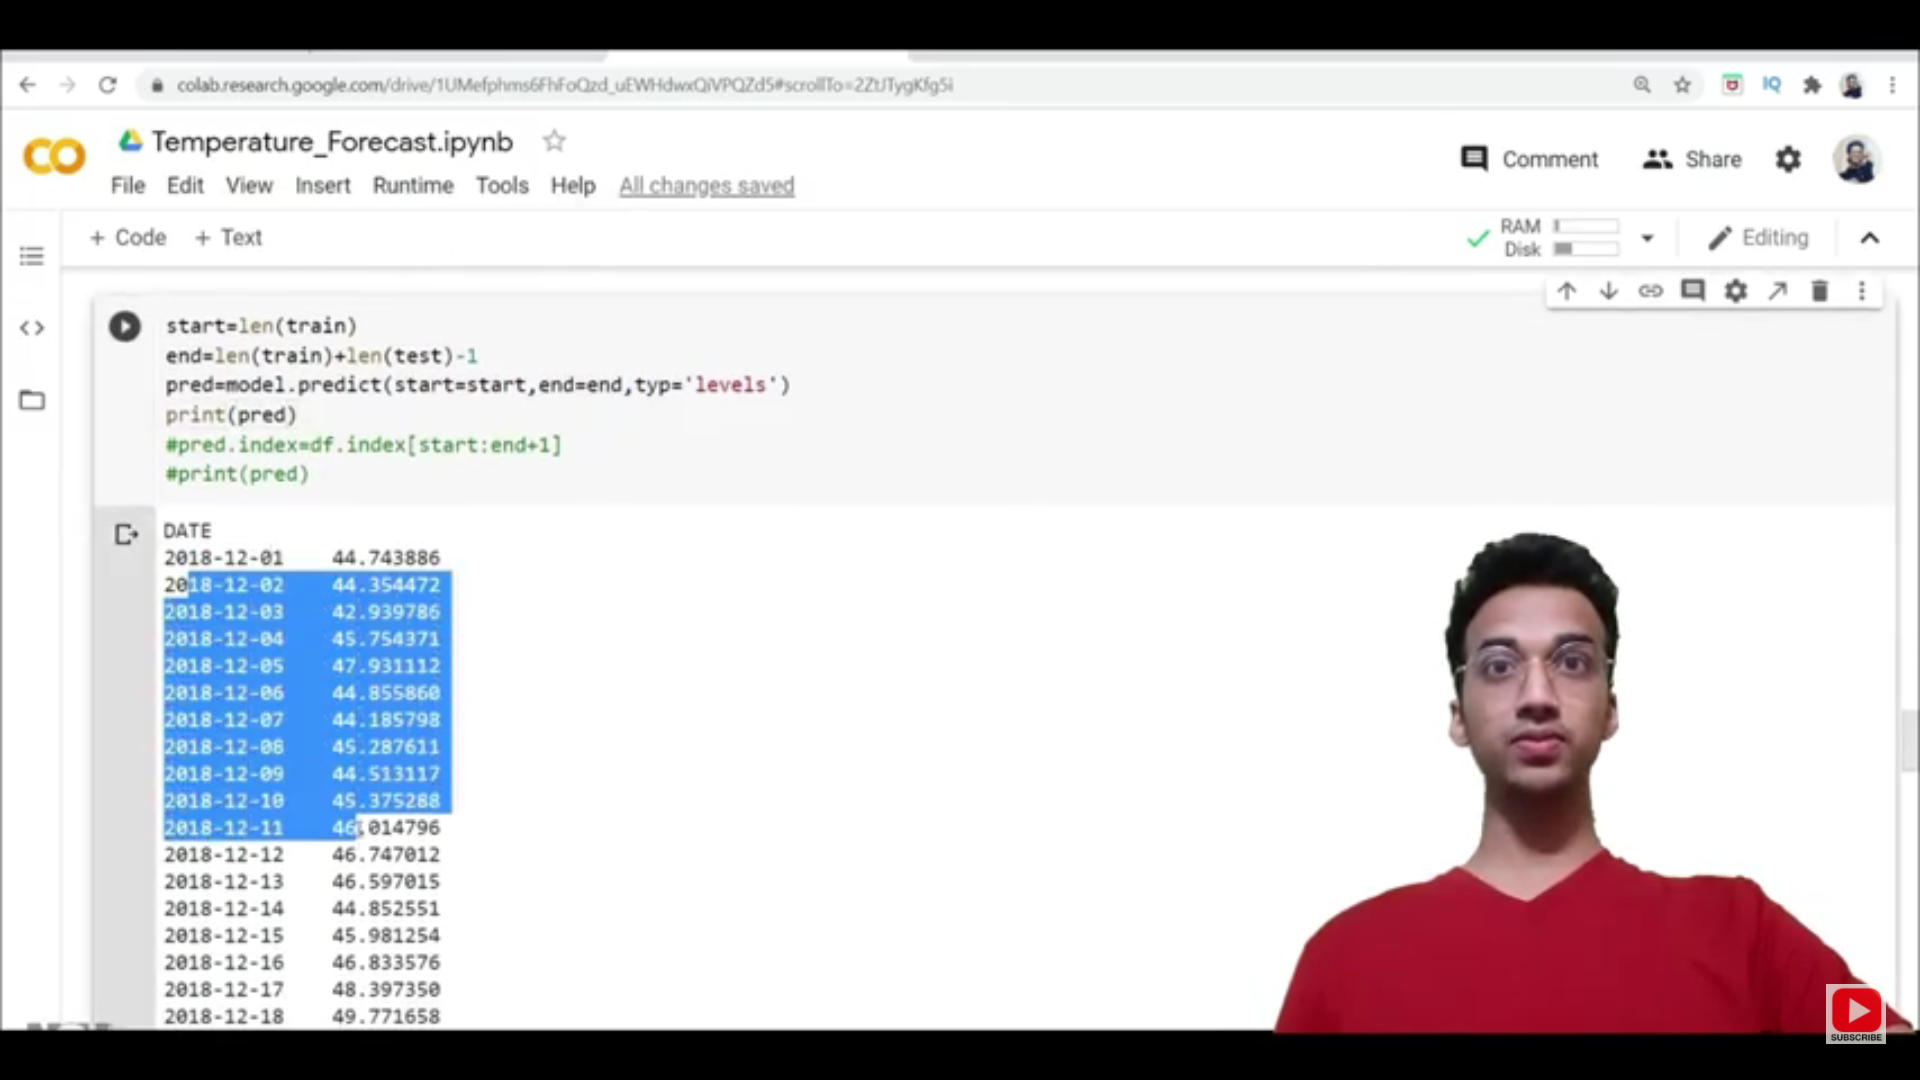

#### To check the model is good or bad is by seeing the rmse and compare it with mean. 

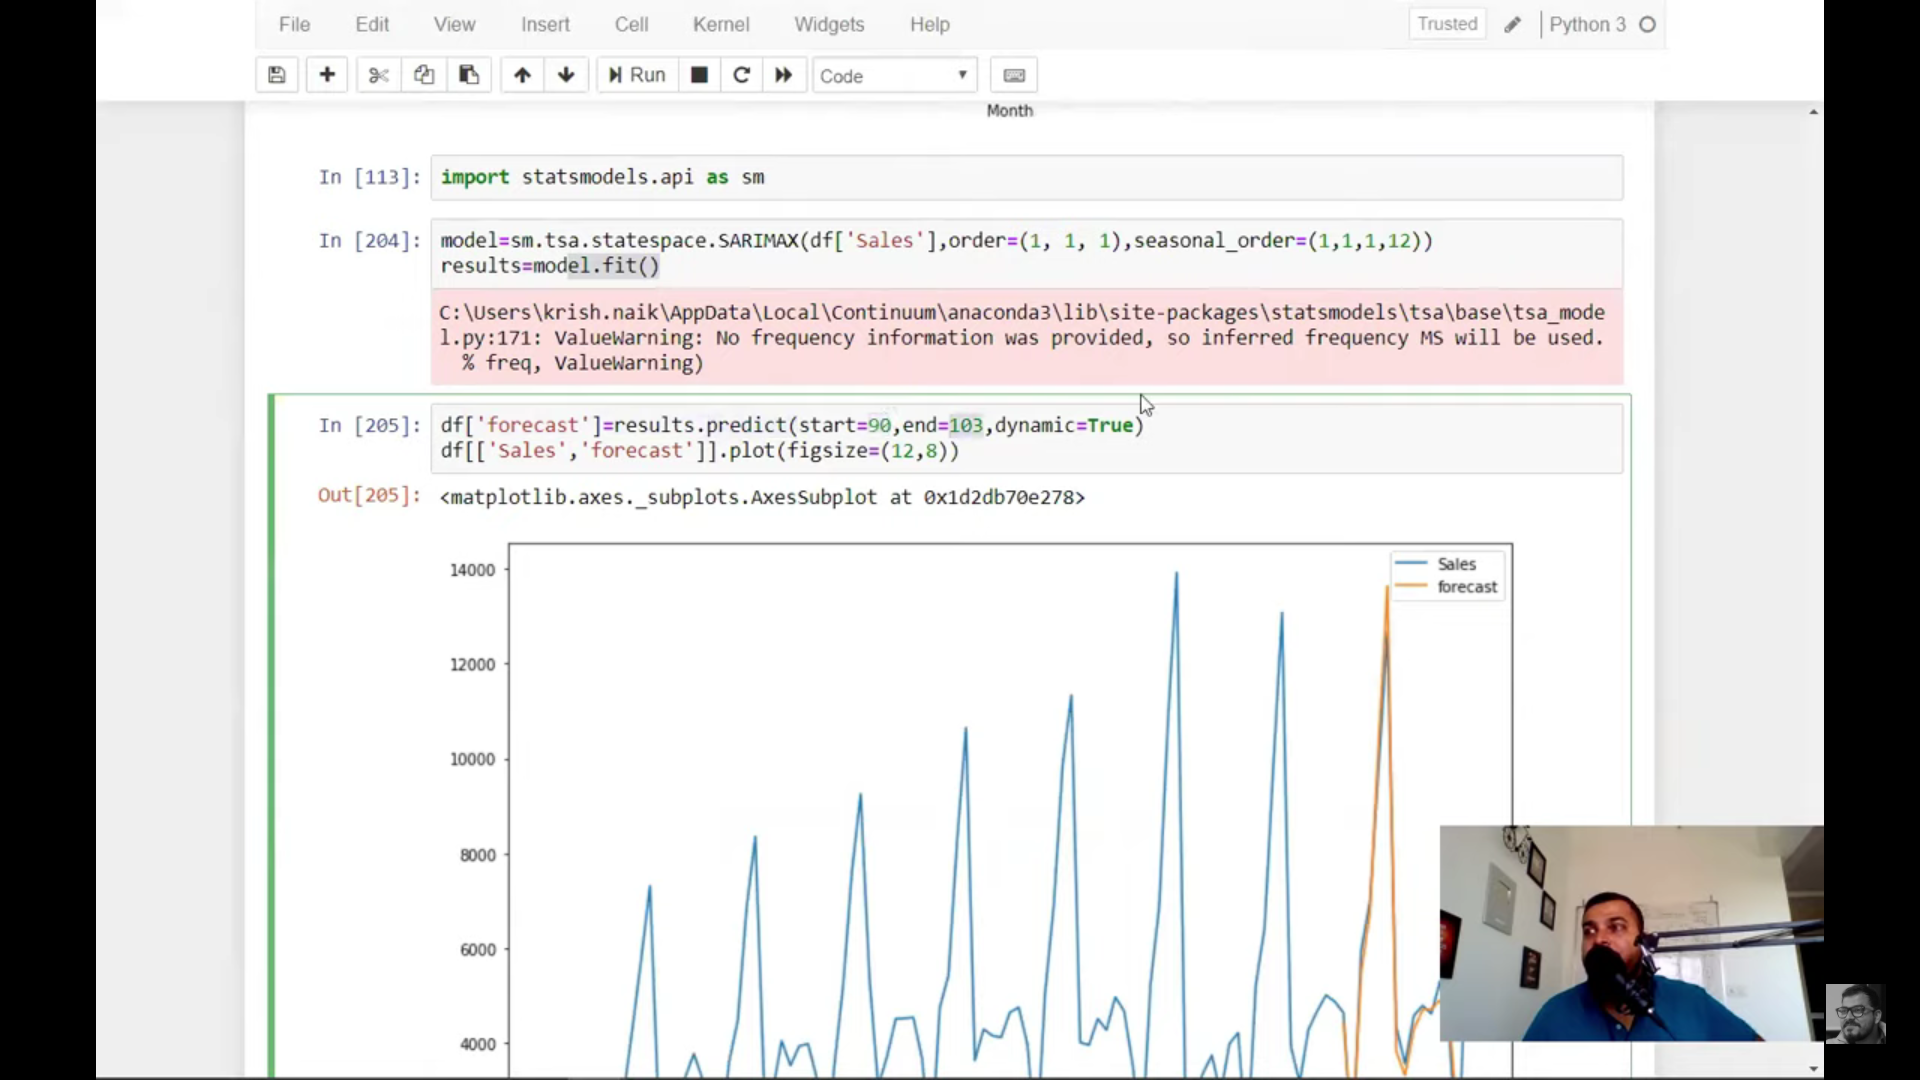

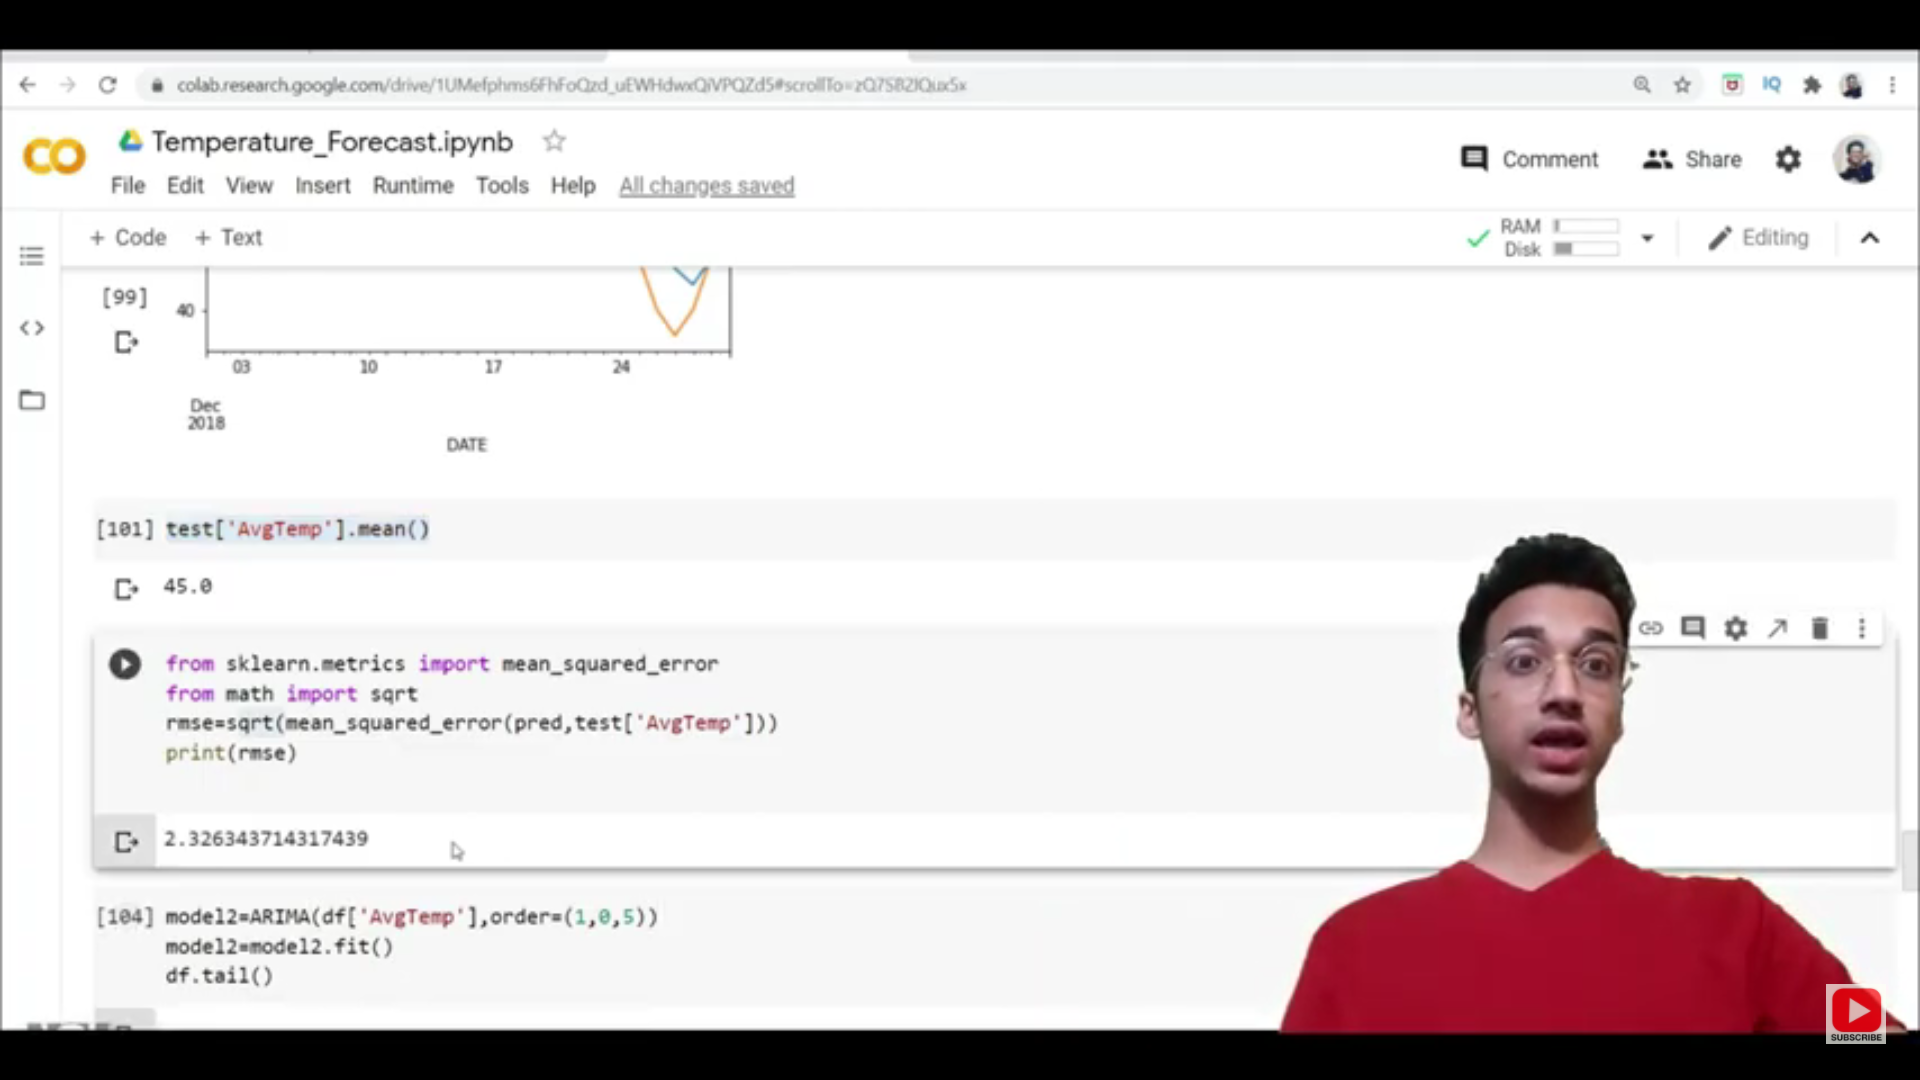

https://pub.towardsai.net/basic-of-time-series-with-python-a2f7cb451a76

In [1]:
# https://machinelearningmastery.com/cnn-long-short-term-memory-networks/

cnn = Sequential()
cnn.add(Conv2D(...))
cnn.add(MaxPooling2D(...))
cnn.add(Flatten())
# define LSTM model
model = Sequential()
model.add(TimeDistributed(cnn, ...))
model.add(LSTM(..))
model.add(Dense(...))

SyntaxError: invalid syntax (<ipython-input-1-11863af357aa>, line 8)

In [30]:
import matplotlib
import pandas as pd
df = pd.read_csv("D:/Work/Python/py_master/pandas/14_ts_datetimeindex/aapl.csv", parse_dates=["Date"], index_col="Date")
df.head(5)

Open    High     Low   Close    Volume
Date                                                
2017-07-07  142.90  144.75  142.90  144.18  19201712
2017-07-06  143.02  143.50  142.41  142.73  24128782
2017-07-05  143.69  144.79  142.72  144.09  21569557
2017-07-03  144.88  145.30  143.10  143.50  14277848
2017-06-30  144.45  144.96  143.78  144.02  23024107

In [17]:
type(df.Date[0])      #First need to check the datatype of date column

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
df["2017-07-07"].Close.mean()

144.18

In [24]:
df["2017-07-07":"2017-07-01"]    #Range of data dpending on date index

Open    High     Low   Close    Volume
Date                                                
2017-07-07  142.90  144.75  142.90  144.18  19201712
2017-07-06  143.02  143.50  142.41  142.73  24128782
2017-07-05  143.69  144.79  142.72  144.09  21569557
2017-07-03  144.88  145.30  143.10  143.50  14277848

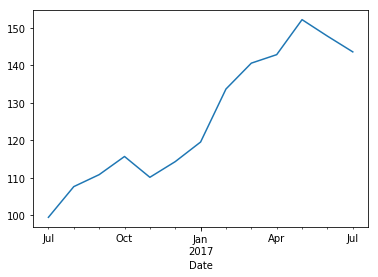

In [39]:
%matplotlib inline    
df.Close.resample('M').mean().plot()    #Mean of close price on monthly frequency
#M,Q,

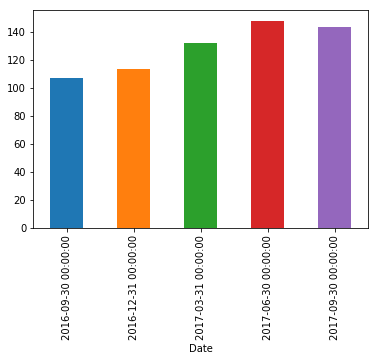

In [42]:
%matplotlib inline  
df.Close.resample('Q').mean().plot(kind="bar")    #Mean of close price on monthly frequency
#M,Q,W,B is for monthly, quaterly, weekly, business day

In [2]:
import pandas as pd 
df_nd = pd.read_csv("D:/Work/Python/py_master/pandas/15_ts_date_range/aapl_no_dates.csv")
df_nd.head()

Open    High     Low   Close    Volume
0  153.17  153.33  152.22  153.18  16404088
1  153.58  155.45  152.89  155.45  27770715
2  154.34  154.45  153.46  153.93  25331662
3  153.90  155.81  153.78  154.45  26624926
4  155.02  155.98  154.48  155.37  21069647

# Dataset with no dates column

In [5]:
rang=pd.date_range(start="06/01/2017",end ="06/30/2017", freq='B')  # To set the date range if we dont have dates
rang

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [12]:
df_nd.set_index(rang,inplace=True)
df_nd

Open    High     Low   Close    Volume
2017-06-01  153.17  153.33  152.22  153.18  16404088
2017-06-02  153.58  155.45  152.89  155.45  27770715
2017-06-05  154.34  154.45  153.46  153.93  25331662
2017-06-06  153.90  155.81  153.78  154.45  26624926
2017-06-07  155.02  155.98  154.48  155.37  21069647
2017-06-08  155.25  155.54  154.40  154.99  21250798
2017-06-09  155.19  155.19  146.02  148.98  64882657
2017-06-12  145.74  146.09  142.51  145.42  72307330
2017-06-13  147.16  147.45  145.15  146.59  34165445
2017-06-14  147.50  147.50  143.84  145.16  31531232
2017-06-15  143.32  144.48  142.21  144.29  32165373
2017-06-16  143.78  144.50  142.20  142.27  50361093
2017-06-19  143.66  146.74  143.66  146.34  32541404
2017-06-20  146.87  146.87  144.94  145.01  24900073
2017-06-21  145.52  146.07  144.61  145.87  21265751
2017-06-22  145.77  146.70  145.12  145.63  19106294
2017-06-23  145.13  147.16  145.11  146.28  35439389
2017-06-26  147.17  148.28  145.38  145.82  25692361
2017-06-27  145.01  146.16  143.62  143.73  24761891
2017-06-28  144.49  146.11  143.16  145.83  22082432
2017-06-29  144.71  145.13  142.28  143.68  31499368
2017-06-30  144.45  144.96  143.78  144.02  23024107

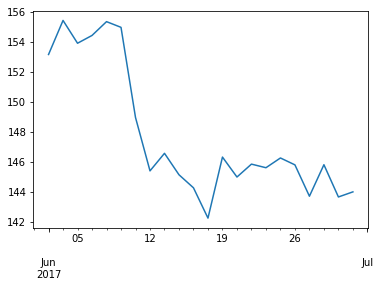

In [13]:
%matplotlib inline
df_nd.Close.plot()

In [14]:
df_nd.asfreq('D',method='pad')   #Generates the prices for weekend also by method pad and freq day

Open    High     Low   Close    Volume
2017-06-01  153.17  153.33  152.22  153.18  16404088
2017-06-02  153.58  155.45  152.89  155.45  27770715
2017-06-03  153.58  155.45  152.89  155.45  27770715
2017-06-04  153.58  155.45  152.89  155.45  27770715
2017-06-05  154.34  154.45  153.46  153.93  25331662
2017-06-06  153.90  155.81  153.78  154.45  26624926
2017-06-07  155.02  155.98  154.48  155.37  21069647
2017-06-08  155.25  155.54  154.40  154.99  21250798
2017-06-09  155.19  155.19  146.02  148.98  64882657
2017-06-10  155.19  155.19  146.02  148.98  64882657
2017-06-11  155.19  155.19  146.02  148.98  64882657
2017-06-12  145.74  146.09  142.51  145.42  72307330
2017-06-13  147.16  147.45  145.15  146.59  34165445
2017-06-14  147.50  147.50  143.84  145.16  31531232
2017-06-15  143.32  144.48  142.21  144.29  32165373
2017-06-16  143.78  144.50  142.20  142.27  50361093
2017-06-17  143.78  144.50  142.20  142.27  50361093
2017-06-18  143.78  144.50  142.20  142.27  50361093
2017-06-19  143.66  146.74  143.66  146.34  32541404
2017-06-20  146.87  146.87  144.94  145.01  24900073
2017-06-21  145.52  146.07  144.61  145.87  21265751
2017-06-22  145.77  146.70  145.12  145.63  19106294
2017-06-23  145.13  147.16  145.11  146.28  35439389
2017-06-24  145.13  147.16  145.11  146.28  35439389
2017-06-25  145.13  147.16  145.11  146.28  35439389
2017-06-26  147.17  148.28  145.38  145.82  25692361
2017-06-27  145.01  146.16  143.62  143.73  24761891
2017-06-28  144.49  146.11  143.16  145.83  22082432
2017-06-29  144.71  145.13  142.28  143.68  31499368
2017-06-30  144.45  144.96  143.78  144.02  23024107

In [22]:
rng1 = pd.date_range(start="06/01/2017",periods =72,freq='H')
rng1

DatetimeIndex(['2017-06-01 00:00:00', '2017-06-01 01:00:00',
               '2017-06-01 02:00:00', '2017-06-01 03:00:00',
               '2017-06-01 04:00:00', '2017-06-01 05:00:00',
               '2017-06-01 06:00:00', '2017-06-01 07:00:00',
               '2017-06-01 08:00:00', '2017-06-01 09:00:00',
               '2017-06-01 10:00:00', '2017-06-01 11:00:00',
               '2017-06-01 12:00:00', '2017-06-01 13:00:00',
               '2017-06-01 14:00:00', '2017-06-01 15:00:00',
               '2017-06-01 16:00:00', '2017-06-01 17:00:00',
               '2017-06-01 18:00:00', '2017-06-01 19:00:00',
               '2017-06-01 20:00:00', '2017-06-01 21:00:00',
               '2017-06-01 22:00:00', '2017-06-01 23:00:00',
               '2017-06-02 00:00:00', '2017-06-02 01:00:00',
               '2017-06-02 02:00:00', '2017-06-02 03:00:00',
               '2017-06-02 04:00:00', '2017-06-02 05:00:00',
               '2017-06-02 06:00:00', '2017-06-02 07:00:00',
               '2017-06-

In [28]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [30]:
rang=pd.date_range(start="06/01/2017",end ="06/30/2017", freq=usb)  # To set the date range if we dont have dates
rang

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='C')

In [32]:
df_nd.set_index(rang,inplace=True)
df_nd

Open    High     Low   Close    Volume
2017-06-01  153.17  153.33  152.22  153.18  16404088
2017-06-02  153.58  155.45  152.89  155.45  27770715
2017-06-05  154.34  154.45  153.46  153.93  25331662
2017-06-06  153.90  155.81  153.78  154.45  26624926
2017-06-07  155.02  155.98  154.48  155.37  21069647
2017-06-08  155.25  155.54  154.40  154.99  21250798
2017-06-09  155.19  155.19  146.02  148.98  64882657
2017-06-12  145.74  146.09  142.51  145.42  72307330
2017-06-13  147.16  147.45  145.15  146.59  34165445
2017-06-14  147.50  147.50  143.84  145.16  31531232
2017-06-15  143.32  144.48  142.21  144.29  32165373
2017-06-16  143.78  144.50  142.20  142.27  50361093
2017-06-19  143.66  146.74  143.66  146.34  32541404
2017-06-20  146.87  146.87  144.94  145.01  24900073
2017-06-21  145.52  146.07  144.61  145.87  21265751
2017-06-22  145.77  146.70  145.12  145.63  19106294
2017-06-23  145.13  147.16  145.11  146.28  35439389
2017-06-26  147.17  148.28  145.38  145.82  25692361
2017-06-27  145.01  146.16  143.62  143.73  24761891
2017-06-28  144.49  146.11  143.16  145.83  22082432
2017-06-29  144.71  145.13  142.28  143.68  31499368
2017-06-30  144.45  144.96  143.78  144.02  23024107

Converting date column into common format of date by to_datetime

In [2]:
import pandas as pd
dates = ['2017-01-05','Jan 5, 2017','01/05/2017','2017.01.05','20170105','2017/01/05']
pd.to_datetime(dates)     #To make a common formate 

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [5]:
pd.to_datetime('5/1/2017', format='%d/%m/%Y')   # We can use our format also to set the date

Timestamp('2017-01-05 00:00:00')

In [6]:
pd.to_datetime('5$1$2017', format='%d$%m$%Y') # We can use diff delimeter also to set the dates

Timestamp('2017-01-05 00:00:00')

In [11]:
import pandas as pd
dates = ['2017-01-05','Jan 5, 2017','01/05/2017','2017.01.05','20170105','2017/01/05','abc']   
#errors='ignore' will ignore datetime for all data and results nothing,
pd.to_datetime(dates, errors='coerce')  # If we get unwanted string then we use errors. NaT means not a date time 

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05',        'NaT'],
              dtype='datetime64[ns]', freq=None)

# Time Period and Time Span

In [87]:
import pandas as pd
y = pd.Period('2016')  #A-Dec means Anuall period with dec last month 
y

Period('2016', 'A-DEC')

In [13]:
dir(y)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_add_delta',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_typ',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [14]:
y.start_time 

Timestamp('2016-01-01 00:00:00')

In [15]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [17]:
m=pd.Period('2016', freq='M') #M for monthly, freq= Y,M,D,W,H
m

Period('2016-01', 'M')

In [18]:
m +1  # It also perform airthmetic operations

Period('2016-02', 'M')

In [19]:
m +13 #It is fully aware about the calender

Period('2017-02', 'M')

In [22]:
d = pd.Period('2016-5-28')
d #By default is day or what everformate given

Period('2016-05-28', 'D')

In [23]:
d+1 # Next day which is leap year. It is automaticaly smart

Period('2016-05-29', 'D')

In [26]:
q = pd.Period('2017Q1') # Q is for quater and Q-Dec is showing the last quater
q

Period('2017Q1', 'Q-DEC')

In [27]:
q+1 # next quater

Period('2017Q2', 'Q-DEC')

In [29]:
q = pd.Period('2017Q1', freq='Q-JAN')
q

Period('2017Q1', 'Q-JAN')

In [30]:
q.start_time #Starts from 2nd quater

Timestamp('2016-02-01 00:00:00')

In [32]:
q.asfreq('M',how="end") # we can chnage the freqency also and where we want to start the month we can show by howin

Period('2016-04', 'M')

In [33]:
idx = pd.period_range('2011','2017', freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [37]:
idx[0].start_time # Its start time is nov of 2010

Timestamp('2010-11-01 00:00:00')

In [38]:
idx[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [39]:
idx = pd.period_range('2011', periods =10,freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [43]:
idx_1= idx.to_timestamp() #Convert into timestamp
idx_1

DatetimeIndex(['2010-11-01', '2011-02-01', '2011-05-01', '2011-08-01',
               '2011-11-01', '2012-02-01', '2012-05-01', '2012-08-01',
               '2012-11-01', '2013-02-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [44]:
idx_1.to_period() #convert into period

PeriodIndex(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
             '2012Q2', '2012Q3', '2012Q4', '2013Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Exercise for wallmart dataset

In [53]:
import pandas as pd
df = pd.read_csv("D:/Work/Python/py_master/pandas/18_ts_period/wmt.csv")
df

Line Item  2017Q1  2017Q2  2017Q3  2017Q4  2018Q1
0   Revenue  115904  120854  118179  130936  117542
1  Expenses   86544   89485   87484   97743   87688
2    Profit   29360   31369   30695   33193   29854

In [54]:
df.set_index('Line Item', inplace=True)
df

2017Q1  2017Q2  2017Q3  2017Q4  2018Q1
Line Item                                        
Revenue    115904  120854  118179  130936  117542
Expenses    86544   89485   87484   97743   87688
Profit      29360   31369   30695   33193   29854

In [58]:
df = df.T # Transpose rows to columns and vice-versa
df

Line Item  Revenue  Expenses  Profit
2017Q1      115904     86544   29360
2017Q2      120854     89485   31369
2017Q3      118179     87484   30695
2017Q4      130936     97743   33193
2018Q1      117542     87688   29854

In [59]:
df.index # It is type object index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [60]:
df.index =pd.PeriodIndex(df.index, freq ='Q-JAN')
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [64]:
df['start date'] = df.index.map(lambda x: x.start_time)
df

Line Item  Revenue  Expenses  Profit start date
2017Q1      115904     86544   29360 2016-02-01
2017Q2      120854     89485   31369 2016-05-01
2017Q3      118179     87484   30695 2016-08-01
2017Q4      130936     97743   33193 2016-11-01
2018Q1      117542     87688   29854 2017-02-01

In [65]:
df['end date'] = df.index.map(lambda x: x.end_time)
df

Line Item  Revenue  Expenses  Profit start date   end date
2017Q1      115904     86544   29360 2016-02-01 2016-04-30
2017Q2      120854     89485   31369 2016-05-01 2016-07-31
2017Q3      118179     87484   30695 2016-08-01 2016-10-31
2017Q4      130936     97743   33193 2016-11-01 2017-01-31
2018Q1      117542     87688   29854 2017-02-01 2017-04-30

Time Zone in Python and Pandas

In [71]:
import pandas as pd
df = pd.read_csv('D:/Work/Python/py_master/pandas/19_ts_timezone/msft.csv', header =1, index_col='Date Time', parse_dates=True)
df

Price
Date Time                 
2017-08-17 09:00:00  72.38
2017-08-17 09:15:00  71.00
2017-08-17 09:30:00  71.67
2017-08-17 10:00:00  72.80
2017-08-17 10:30:00  73.00
2017-08-17 11:00:00  72.50

In [72]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [73]:
df = df.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

In [1]:
from pytz import all_timezones  # All timezones are importing form here 
all_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [75]:
df =df.index.tz_convert(tz='Asia/Calcutta')   #convert timezone
df

DatetimeIndex(['2017-08-17 18:30:00+05:30', '2017-08-17 18:45:00+05:30',
               '2017-08-17 19:00:00+05:30', '2017-08-17 19:30:00+05:30',
               '2017-08-17 20:00:00+05:30', '2017-08-17 20:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date Time', freq=None)

Shifting and lagging 

In [77]:
import pandas as pd
df = pd.read_csv('D:/Work/Python/py_master/pandas/20_shift_lag/fb.csv')
df.shift(1) # Shift the price by 1 day

Date   Price
0        NaN     NaN
1  15-Aug-17  171.00
2  16-Aug-17  170.00
3  17-Aug-17  166.91
4  18-Aug-17  167.41
5  21-Aug-17  167.78
6  22-Aug-17  169.64
7  23-Aug-17  168.71
8  24-Aug-17  167.74
9  25-Aug-17  166.32

In [79]:
df.shift(-1) #Reverse Shift 

Date   Price
0  16-Aug-17  170.00
1  17-Aug-17  166.91
2  18-Aug-17  167.41
3  21-Aug-17  167.78
4  22-Aug-17  169.64
5  23-Aug-17  168.71
6  24-Aug-17  167.74
7  25-Aug-17  166.32
8  28-Aug-17  167.24
9        NaN     NaN

In [82]:
df['Previous day price'] = df['Price'].shift(-1)
df

Date   Price  previous day price  Previous day price
0  15-Aug-17  171.00              170.00              170.00
1  16-Aug-17  170.00              166.91              166.91
2  17-Aug-17  166.91              167.41              167.41
3  18-Aug-17  167.41              167.78              167.78
4  21-Aug-17  167.78              169.64              169.64
5  22-Aug-17  169.64              168.71              168.71
6  23-Aug-17  168.71              167.74              167.74
7  24-Aug-17  167.74              166.32              166.32
8  25-Aug-17  166.32              167.24              167.24
9  28-Aug-17  167.24                 NaN                 NaN

In [83]:
df['1 day change'] = df['Price'] - df['Previous day price']
df

Date   Price  previous day price  Previous day price  1 day change
0  15-Aug-17  171.00              170.00              170.00          1.00
1  16-Aug-17  170.00              166.91              166.91          3.09
2  17-Aug-17  166.91              167.41              167.41         -0.50
3  18-Aug-17  167.41              167.78              167.78         -0.37
4  21-Aug-17  167.78              169.64              169.64         -1.86
5  22-Aug-17  169.64              168.71              168.71          0.93
6  23-Aug-17  168.71              167.74              167.74          0.97
7  24-Aug-17  167.74              166.32              166.32          1.42
8  25-Aug-17  166.32              167.24              167.24         -0.92
9  28-Aug-17  167.24                 NaN                 NaN           NaN

In [86]:
df.tshift(1) # Shift the date only not value

TypeError: unhashable type: 'list'

# Datacamp Tutorials

In [ ]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index) # Index is column which was set as index in df

# Plot 2012 data using slicing
diet['2012'].plot()
plt.show()

# Plot the entire time series diet and show gridlines
diet['2012'].plot(grid=True)
plt.show()

In [ ]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')
stocks_and_bonds

In [ ]:
# Corelation with Time Series
#Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()  #It will show the percentage change

# Compute correlation using corr()
correlation = returns.SP500.corr(returns.US10Y)
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(x=returns.SP500, y=returns.US10Y)
plt.show()

#Two trending series may show a strong correlation even if they are completely unrelated. 
#This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, 
#you should look at the correlation of their returns and not their levels.
#Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)
levels

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)


# Time Series in regression and working with correlation, coeficient and R squared

In [ ]:
#Linear regression is also know as OLS i.e ordinary least squares

import statsmodels.api as sm
sm.OLS(y,x).fit()

import numpy as np
np.polyfit(x,y,deg=1)

import pandas as pd
pd.OLS(y,x)

from scipy import stats
stats.linregress(x,y)

#Delete the NaN value in pandas
df =df.dropna()

#Relationship between correlation and Rsquared
#|corr(x,y)2| = R2 or (R squared)
#sign(corr) = sign of regression slope

#R-squared measures how closely the data fit the regression line, 
#so the R-squared in a simple regression is related to the correlation between the two variables.


# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
x = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame x
x = sm.add_constant(x)

# Fit the regression of y on x
result = sm.OLS(y,x).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

#Autocorrelation is correlation with itself. means with same series lagged by one day
#Example -   5, 
            #10, 5
            #20, 10
# Traders is making money by autocorrelation
#Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column),
#so you will have to select the column in the DataFrame.

# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W', how='last')

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

# Autocorelation function 

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

#the standard deviation of the sample autocorrelation is 1/N−−√ where N is the number of observations, so if N=100, 
#for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/N−−√

# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05,lags=20)
plt.show()


